<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import pearsonr

Загрузить датасет по url:


In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

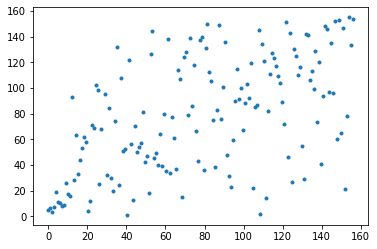

In [4]:
len_column = len(df['Freedom'])
x = np.linspace(0, len_column, len_column)
plt.scatter(x, df['Freedom'], marker='.')

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


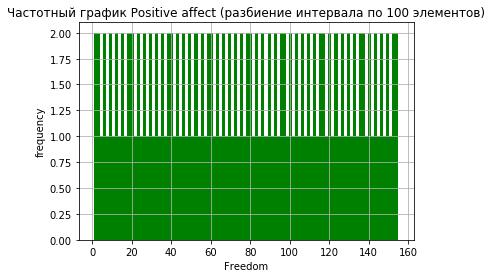

In [5]:
n, bins, patches = plt.hist(df['Freedom'], 100, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

### Распределение: равномерное

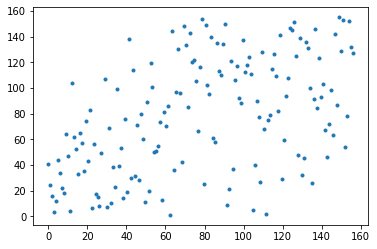

In [6]:
len_column_2 = len(df['Positive affect'])
x_2 = np.linspace(0, len_column_2, len_column_2)
plt.scatter(x_2, df['Positive affect'], marker='.')

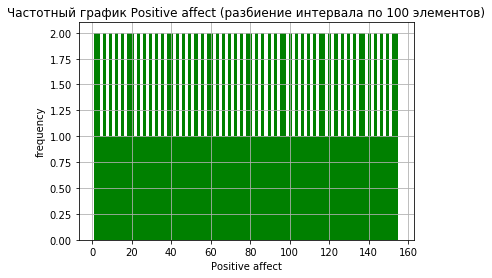

In [7]:
n, bins, patches = plt.hist(df['Positive affect'], 100, facecolor='g')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Частотный график Positive affect (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

### Распределение: равномерное

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [8]:
# Колонка Freedom
freedom = df['Freedom']
freedom.isnull().sum()

# медиана
print('Медиана: ', statistics.median(freedom))

# стандартное отклонение
print('Стандартное отклонение: ', statistics.pstdev(freedom))

# дисперсия 
print('Дисперсия: ', statistics.pvariance(freedom))

# минимум
print('Минимум: ', min(freedom))

# максимум
print('Максимум: ', max(freedom))

# размах
print('Размах: ', max(freedom) - min(freedom)) 

Медиана:  71.0
Стандартное отклонение:  nan
Дисперсия:  nan
Минимум:  1.0
Максимум:  155.0
Размах:  154.0


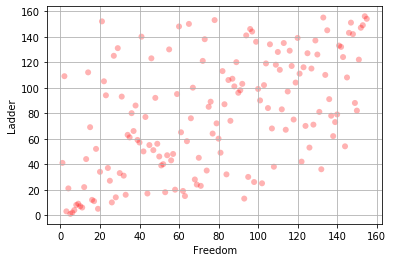

In [9]:
# выбросы
freedom = df['Freedom']
ladder = df['Ladder']
fig, ax = plt.subplots()
ax.scatter(freedom, ladder, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Freedom')
plt.ylabel('Ladder')
plt.show()

#### Явных выбросов не наблюдается

In [10]:
# мода
print('Мода: ', statistics.mode(freedom))

StatisticsError: no unique mode; found 156 equally common values

Почему нельзя найти моду?

#### no unique mode; found 156 equally common values
нет уникального режима; найдено 156 одинаково распространенных значений

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

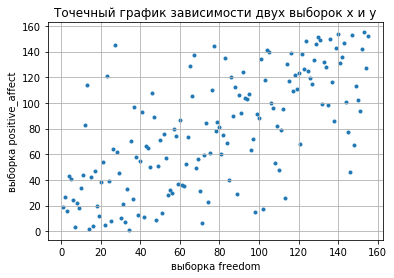

In [11]:
freedom = df['Freedom']
positive_affect = df['Positive affect']

#freedom.isnull().sum()
#positive_affect.isnull().sum()

plt.xlabel('выборка freedom')
plt.ylabel('выборка positive_affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [14]:
corr, p_value = pearsonr(freedom, positive_affect)
print(corr)

ValueError: array must not contain infs or NaNs

#### Корреляция между Freedom и positive affect  = "0,68"
Значение из матрицы корреляции

### Чем больше значение Freedom, тем с большей вероятностью больше Positive affect

In [15]:
freedom = df['Freedom']
positive_affect = df['Positive affect']

freedom.isnull().mean()
positive_affect.isnull().mean()

#freedom[np.nan_to_num(freedom)]
#positive_affect[np.nan_to_num(positive_affect)]
#np.nan_to_num(np.array(freedom)).mean()
#np.nan_to_num(np.array(positive_affect)).mean()

#plt.scatter(freedom, positive_affect, marker='.')
corr, p_value = pearsonr(freedom, positive_affect)
print(corr)

ValueError: array must not contain infs or NaNs

### Не могу понять что не нравится функции? Почему array must not contain infs or NaNs?

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [16]:
print('Количество строк', len(df))

Количество строк 156


In [17]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Freedom']])
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0
0,0.025974
1,0.032468
2,0.012987
3,0.038961
4,0.116883


Построить матрицу корреляций для всех колонок таблицы

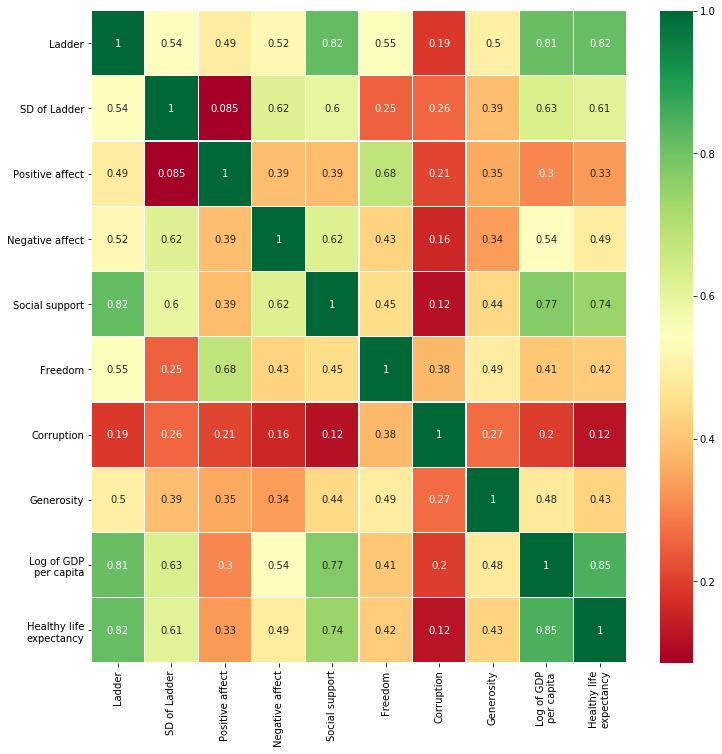

In [18]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [19]:
df2=pd.read_csv('avocado.csv')
df2[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

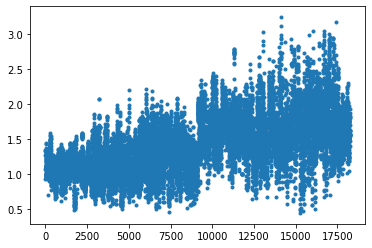

In [20]:
len_column = len(df2['AveragePrice'])
x = np.linspace(0, len_column, len_column)
plt.scatter(x, df2['AveragePrice'], marker='.')

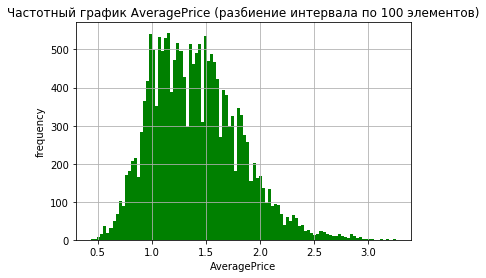

In [21]:
n, bins, patches = plt.hist(df2['AveragePrice'], 100, facecolor='g')

plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.title('Частотный график AveragePrice (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

#### Это нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

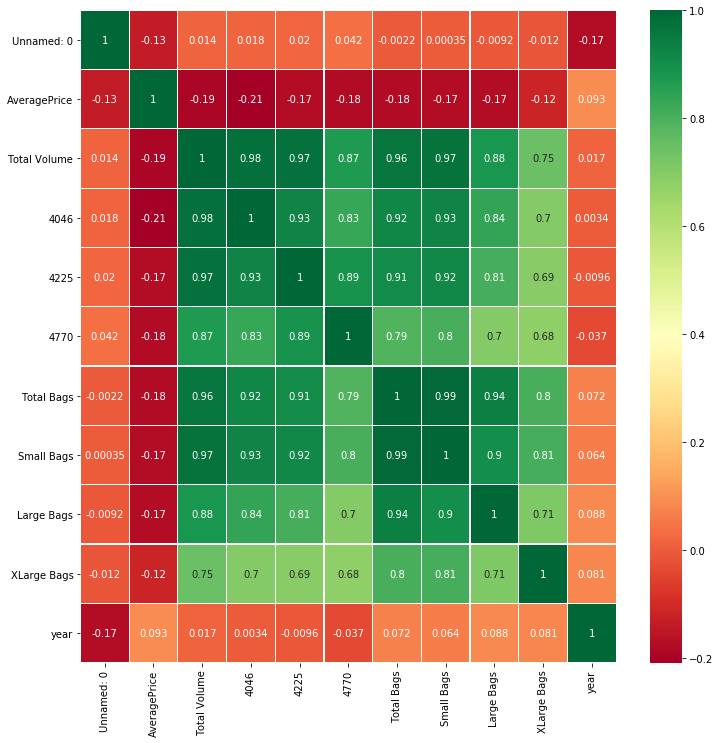

In [22]:
import seaborn as sns
sns.heatmap(df2.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### Корреляция между Average Price и:
- 4046 - "-0,21"
- 4225 - "-0,17"
- 4770 - "-0,18"

Обратная корреляция, т.е.чем больше значение Average Price, тем меньше значения в колонках 4046, 4225, 4770 